# A/B Test with 3 promotions
# This is a dataset from an unknown store that tried 3 different promotions during a period of time, I will evaluate which promotion worked best

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
# Check null values
df.isnull().values.any()

False

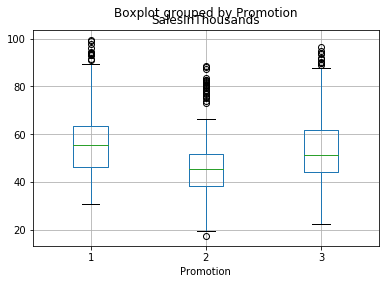

In [4]:
df.boxplot(by='Promotion', column='SalesInThousands')

### We can see from the boxplot that Promotion 2 generated the least amount of sales but we wont draw drastic conclusions since we don't know yet if it's significant

# Now I want to do an ANOVA test to see if the promotions are equally significant (5%)

In [352]:
n = df
n = n[['Promotion', 'SalesInThousands']]
fin = n.sort_values('Promotion').reset_index()

In [353]:
fstat, pval = f_oneway(fin.loc[fin['Promotion'] == 1],fin.loc[fin['Promotion'] == 2],fin.loc[fin['Promotion'] == 3])
print(pval)

[1.72447023e-01            nan 6.76584926e-10]


### The third value is the p-value for the sales by promotion, which tells me at least one pair of populations is significantly different so I'll do a Tukey's test

In [354]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(fin.SalesInThousands.values, fin.Promotion, 0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -10.7696  0.001 -14.774 -6.7652   True
     1      3  -2.7345 0.2447 -6.7389  1.2698  False
     2      3   8.0351  0.001  4.1207 11.9494   True
----------------------------------------------------


## I'll reject promotion 2

# My recommendation would be to look in to promotion 1&3 and see what the differences and similarities are and maybe conduct a new A/B test based on them. Maybe remove some similarities from one of them to see how those factors influence the revenue. If there are no similarities then maybe change one of the two promotions to see if that creates more of a shift.